---
title: LAB 5 Insurance Costs
author: Alexa Dandridge
format:
    html:
        embed-resources: true
        code-line numbers: true

---
**GitHub Repository** <https://github.com/alexadandridge/Positron-Class-Week-0->

**PART ONE** Data Exploration

*Summary:* The information contained in the data includes: age of primary beneficiary, gender of primary beneficiary (only female, male recorded), body mass index, whether beneficiary smokes, beneficiary's residential area, and individual medical costs billed by health insurance. 

In [70]:
# Importing necessary libraries
import pandas as pd
import numpy as np

1. Read in the dataset and display some summaries of the data.

In [71]:
# Reading in the data and printing the first few lines
insurancedf = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insurancedf.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


<Axes: ylabel='Frequency'>

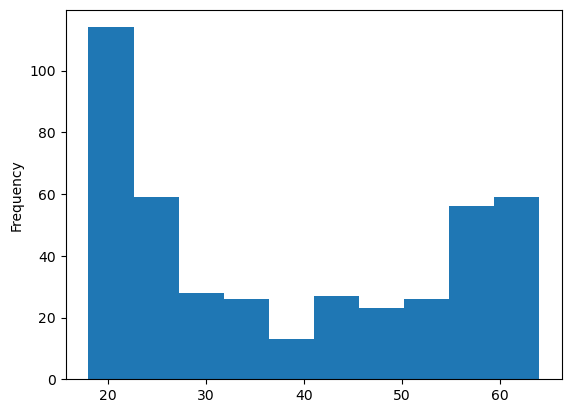

In [72]:
# Displaying the histogram for frequency in the "age" column
insurancedf["age"].plot.hist()

In [73]:
# Showing descriptive stats for the "age" column
insurancedf["age"].describe()

count    431.000000
mean      37.960557
std       16.363909
min       18.000000
25%       22.000000
50%       34.000000
75%       55.000000
max       64.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

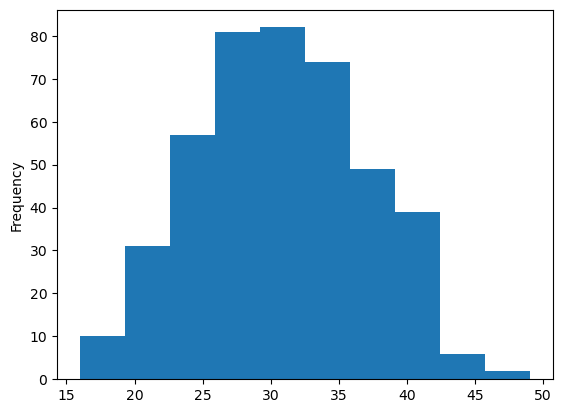

In [74]:
# Displaying the histogram for frequency in the "bmi" column
insurancedf["bmi"].plot.hist()

In [75]:
# Showing descriptive stats for the "bmi" column
insurancedf["bmi"].describe()

count    431.000000
mean      30.768898
std        6.111362
min       15.960000
25%       26.357500
50%       30.590000
75%       35.272500
max       49.060000
Name: bmi, dtype: float64

<Axes: ylabel='Frequency'>

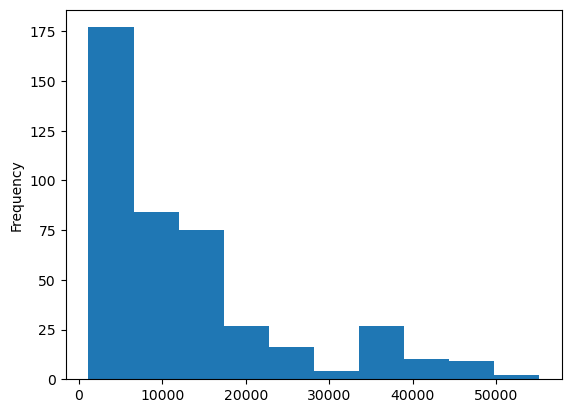

In [76]:
# Displaying the histogram for frequency in the "charges" column
insurancedf["charges"].plot.hist()

In [77]:
# Showing descriptive stats for the "charges" column
insurancedf["charges"].describe()

count      431.000000
mean     12297.098118
std      11876.527128
min       1131.506600
25%       2710.444575
50%       9866.304850
75%      14510.872600
max      55135.402090
Name: charges, dtype: float64

In [78]:
# Showing descriptive stats for the "sex" column
insurancedf["sex"].describe()

count        431
unique         2
top       female
freq         225
Name: sex, dtype: object

In [79]:
# Showing descriptive stats for the "smoker" column
insurancedf["smoker"].describe()

count     431
unique      2
top        no
freq      344
Name: smoker, dtype: object

In [80]:
# Showing descriptive stats for the "region" column
insurancedf["region"].describe()

count           431
unique            4
top       southeast
freq            125
Name: region, dtype: object

2. Fix any concerns you have about the data.

In [81]:
# Checking to see is there is missing information in the dataset
insurancedf.isnull().sum() 
#(output shows that there is no missing data)

age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64

In [82]:
# Checking to see the types of data in each column
insurancedf.dtypes

age          int64
sex         object
bmi        float64
smoker      object
region      object
charges    float64
dtype: object

In [83]:
# Dummifying the sex, smoker, an region columns
insurancedf = pd.get_dummies(insurancedf)
# Printing some of the dataframe to see if dummy variables have been created
insurancedf.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,True,False,False,True,False,False,False,True
1,33,22.705,21984.47061,False,True,True,False,False,True,False,False
2,32,28.880,3866.85520,False,True,True,False,False,True,False,False
3,31,25.740,3756.62160,True,False,True,False,False,False,True,False
4,60,25.840,28923.13692,True,False,True,False,False,True,False,False


In [84]:
# Making the dummy variables numerical
insurancedf = insurancedf * 1
# Printing some of the dataframe to see if categorical variables are shown as 1s or 0s
insurancedf.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,1,0,0,1,0,0,0,1
1,33,22.705,21984.47061,0,1,1,0,0,1,0,0
2,32,28.880,3866.85520,0,1,1,0,0,1,0,0
3,31,25.740,3756.62160,1,0,1,0,0,0,1,0
4,60,25.840,28923.13692,1,0,1,0,0,1,0,0


3. Make up to three plots comparing charges to one of the predictor variables and discuss each plot.

In [85]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

Plot showing age and charges relationship.

In [86]:
# Establishing a linear regression model
lr1_model = LinearRegression()
lr1_model.fit(
    X=insurancedf[["age"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [87]:
# Showing the slope and the y-intercept for this model
lr1_model.coef_, lr1_model.intercept_

(array([228.79904937]), np.float64(3611.758798507093))

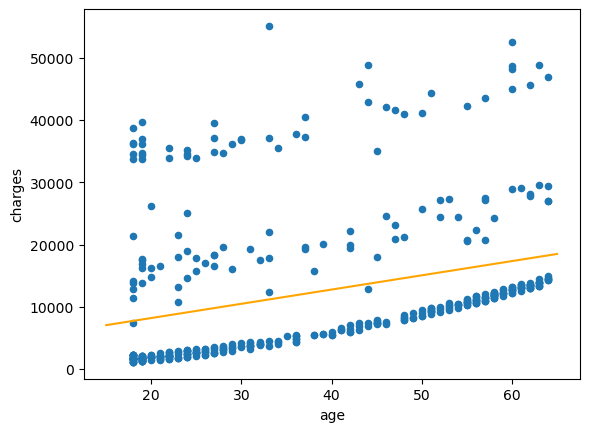

In [88]:
# Printing the actual plot to show age influence on charges
X_new = pd.DataFrame()
X_new["age"] = np.linspace(15, 65, num=1000)
y_new_ = pd.Series(
    lr1_model.predict(X_new),
    index=X_new["age"]
)

insurancedf.plot.scatter(x="age", y="charges")
y_new_.plot.line(c = "orange");

This plot shows the relationship between age(x) and charges(y) by using a simple linear regression model. The model seems to show a positive relationship between the two variables. 

Plot showing bmi and charges relationship.

In [89]:
# Establishing a linear regression model
lr2_model = LinearRegression()
lr2_model.fit(
    X=insurancedf[["bmi"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [90]:
# Showing the slope and the y-intercept for this model
lr2_model.coef_, lr2_model.intercept_

(array([351.66170733]), np.float64(1476.8549458882244))

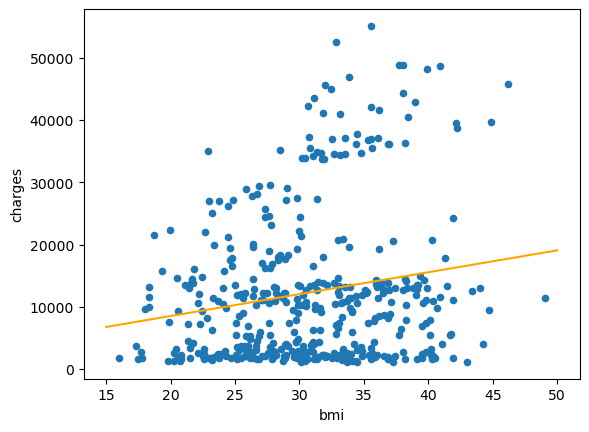

In [91]:
# Printing the actual plot to show age influence on charges
X_new = pd.DataFrame()
X_new["bmi"] = np.linspace(15, 50, num=1000)
y_new_ = pd.Series(
    lr2_model.predict(X_new),
    index=X_new["bmi"]
)

insurancedf.plot.scatter(x="bmi", y="charges")
y_new_.plot.line(c = "orange");

This plot shows the relationship between bmi(x) and charges(y) by using a simple linear regression model. The model seems to show a positive relationship between the two variables. 

Plot showing sex and charges relationship by using sex_female column.

In [92]:
# Establishing a linear regression model
lr3_model = LinearRegression()
lr3_model.fit(
    X=insurancedf[["sex_female"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [93]:
# Showing the slope and the y-intercept for this model
lr3_model.coef_, lr3_model.intercept_

(array([-790.28862184]), np.float64(12709.661783883494))

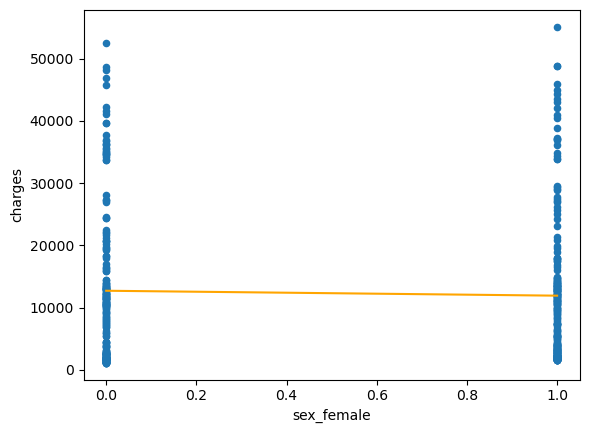

In [94]:
# Printing the actual plot to show age influence on charges
X_new = pd.DataFrame()
X_new["sex_female"] = np.linspace(0, 1, num=1000)
y_new_ = pd.Series(
    lr3_model.predict(X_new),
    index=X_new["sex_female"]
)

insurancedf.plot.scatter(x="sex_female", y="charges")
y_new_.plot.line(c = "orange");

This plot shows the relationship between sex(x) and charges(y) by using a simple linear regression model. Males = 0 and females = 1 on the x axis. Because sex is binary, there are only two visible columns of points. The slope is slightly negative, which means females have slightly lower insurance charges based on this model. 

**PART TWO** Simple Linear Models

Making a model to predict insurance charges from age. 

In [142]:
# Constructing a linear regression model
age_model = LinearRegression()
age_model.fit(
    X=insurancedf[["age"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [143]:
# Showing the slope and the y-intercept for this model
age_model.coef_, age_model.intercept_

(array([228.79904937]), np.float64(3611.758798507093))

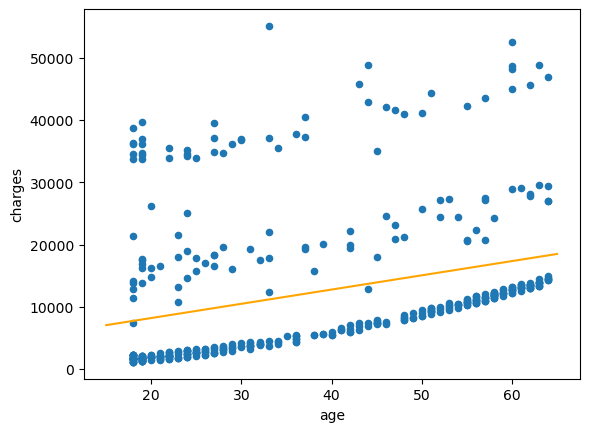

In [144]:
# Printing the actual plot to show age influence on charges
X_new = pd.DataFrame()
X_new["age"] = np.linspace(15, 65, num=1000)
y_new_ = pd.Series(
    age_model.predict(X_new),
    index=X_new["age"]
)

insurancedf.plot.scatter(x="age", y="charges")
y_new_.plot.line(c = "orange");

Visually, the line model seems to fit the data well because it shows a positive trend (which is confirmed by the coefficient estimates) and it fits near where most of the data lies. Based on the coefficient estimates (slope of 228 and y-intercept of 3611), we learn that the regression equation is about: charges = 3611 + 228(age). There is a positive linear relationship between variable in this model. 

Estimating a model that also incorporates sex. 

In [101]:
# Making a model that also incorporates the variable sex (by using sex_female)
agesex_model = LinearRegression()
agesex_model.fit(
    X=insurancedf[["age", "sex_female"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [102]:
# Showing the slope and the y-intercept for this model
agesex_model.coef_, agesex_model.intercept_

(array([ 228.42586236, -649.83258997]), np.float64(3965.164936506786))

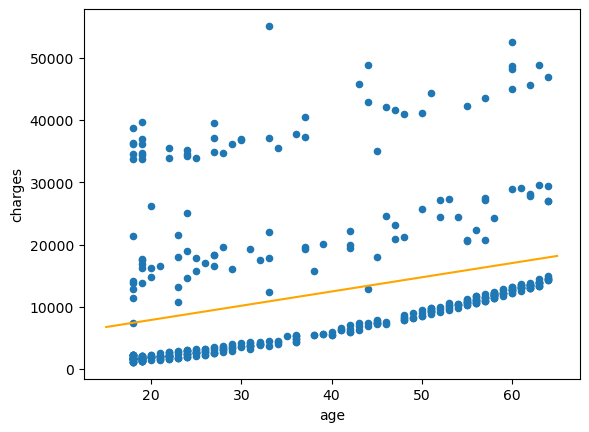

In [107]:
# Printing the actual plot to show age influence on charges
X_new = pd.DataFrame()
X_new["age"] = np.linspace(15, 65, num=1000)
X_new["sex_female"] = 1
y_new_ = pd.Series(
    agesex_model.predict(X_new),
    index=X_new["age"]
)

insurancedf.plot.scatter(x="age", y="charges")
y_new_.plot.line(c = "orange");

There is a positive linear slope for the relationship between age and sex with charges. The new equation (based on the intercepts would be): charges = 3965 + 228(age) + -650(sex_female)

Estimating a model that does not include sex, but does include smoker. 

In [108]:
# Making a model that also incorporates the variable smoker (by using smoker_yes)
agesmoke_model = LinearRegression()
agesmoke_model.fit(
    X=insurancedf[["age", "smoker_yes"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [109]:
# Showing the slope and the y-intercept for this model
agesmoke_model.coef_, agesmoke_model.intercept_

(array([  253.14535549, 24048.86743795]), np.float64(-2166.852295375442))

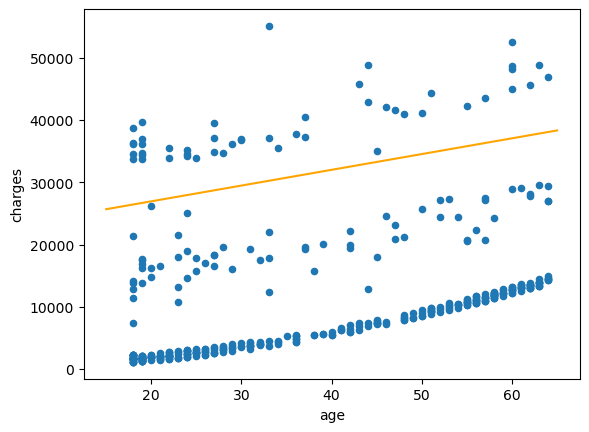

In [110]:
# Printing the actual plot to show age influence on charges
X_new = pd.DataFrame()
X_new["age"] = np.linspace(15, 65, num=1000)
X_new["smoker_yes"] = 1
y_new_ = pd.Series(
    agesmoke_model.predict(X_new),
    index=X_new["age"]
)

insurancedf.plot.scatter(x="age", y="charges")
y_new_.plot.line(c = "orange");

There is a positive linear slope for the relationship between age and smoker with charges. The new equation (based on the intercepts would be): charges = -2166 + 253(age) + 24048(smoker_yes)

Determining which model is better?

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
# Getting predictions for the models

# age and sex model
agesex_pred = agesex_model.predict(insurancedf[["age", "sex_female"]])

# age and sex model
agesmoke_pred = agesmoke_model.predict(insurancedf[["age", "smoker_yes"]])

In [116]:
# Calculating the MSE and R^2 for the sex model
agesexMSE = mean_squared_error(insurancedf["charges"], agesex_pred)
print(agesexMSE)
agesexR2 = r2_score(insurancedf["charges"], agesex_pred)
print(agesexR2)

126633939.67937085
0.10012952499706418


In [117]:
# Calculating the MSE and R^2 for the smoker model
agesmokeMSE = mean_squared_error(insurancedf["charges"], agesmoke_pred)
print(agesmokeMSE)
agesmokeR2 = r2_score(insurancedf["charges"], agesmoke_pred)
print(agesmokeR2)

33719831.46524372
0.7603842948069405


The MSE is higher for the age/sex model and the R2 is higher for the age/smoker model. This shows that the age/smoker model creates predictions that are usually a better fit to the data, and it does a better job at explaining the relationships. 

** PART THREE: Multiple Linear Models**

In [147]:
# Getting predictions for the Q1 model

age_pred = age_model.predict(insurancedf[["age"]])

In [148]:
# Calculating the MSE and R^2 for the Q1 model
ageMSE = mean_squared_error(insurancedf["charges"], age_pred)
print(ageMSE)
ageR2 = r2_score(insurancedf["charges"], age_pred)
print(ageR2)

126739267.9102639
0.09938105452062695


1. Fitting a model that uses age and bmi as predictors.

In [121]:
# Making a model that also incorporates the variable bmi
agebmi_model = LinearRegression()
agebmi_model.fit(
    X=insurancedf[["age", "bmi"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [122]:
# Showing the slope and the y-intercept for this model
agebmi_model.coef_, agebmi_model.intercept_

(array([216.29721472, 283.20380126]), np.float64(-4627.533445708497))

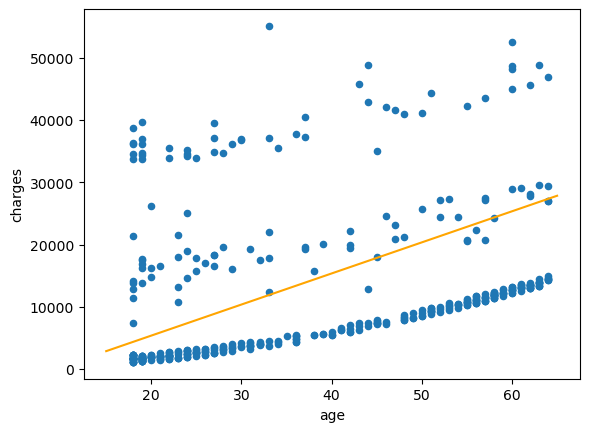

In [123]:
# Printing the actual plot to show age influence on charges
X_new = pd.DataFrame()
X_new["age"] = np.linspace(15, 65, num=1000)
X_new["bmi"] = np.linspace(15, 65, num=1000)
y_new_ = pd.Series(
    agebmi_model.predict(X_new),
    index=X_new["age"]
)

insurancedf.plot.scatter(x="age", y="charges")
y_new_.plot.line(c = "orange");

In [124]:
# Getting predictions for the model

# age and bmi model
agebmi_pred = agebmi_model.predict(insurancedf[["age", "bmi"]])

In [125]:
# Calculating the MSE and R^2 for the bmi model
agebmiMSE = mean_squared_error(insurancedf["charges"], agebmi_pred)
print(agebmiMSE)
agebmiR2 = r2_score(insurancedf["charges"], agebmi_pred)
print(agebmiR2)

123792439.58129103
0.12032144234129338


The MSE seems to be 123792439 and the R2 is 0.12 for the age/bmi model. The MSE in the Q1 model is higher and the Q1 model has a lower R2 value. This means that the age/bmi model does a better job at making predictions than the Q1 model.

2. Fitting a model that uses age and age^2 as predictors. 

In [134]:
# Establishing a linear regression model
insurancedf["age2"] = insurancedf["age"] ** 2

age2_model = LinearRegression()
age2_model.fit(
    X=insurancedf[["age", "age2"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [135]:
# Showing the slope and the y-intercept for this model
age2_model.coef_, age2_model.intercept_

(array([308.42816984,  -1.00150889]), np.float64(2299.730568726638))

In [129]:
insurancedf["age2"].describe()

count     431.000000
mean     1708.160093
std      1312.160216
min       324.000000
25%       484.000000
50%      1156.000000
75%      3025.000000
max      4096.000000
Name: age2, dtype: float64

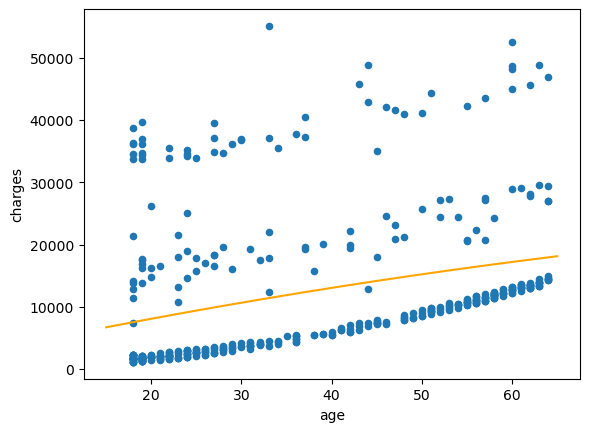

In [136]:
# Printing the actual plot to show age influence on charges
X_new = pd.DataFrame()
X_new["age"] = np.linspace(15, 65, num=1000)
X_new["age2"] = X_new["age"] ** 2
y_new_ = pd.Series(
    age2_model.predict(X_new),
    index=X_new["age"]
)

insurancedf.plot.scatter(x="age", y="charges")
y_new_.plot.line(c = "orange");

In [149]:
# Getting predictions for the model

# age and age^2 model
age2_pred = age2_model.predict(insurancedf[["age", "age2"]])

In [150]:
# Calculating the MSE and R^2 for the age2 model
age2MSE = mean_squared_error(insurancedf["charges"], age2_pred)
print(age2MSE)
age2R2 = r2_score(insurancedf["charges"], age2_pred)
print(age2R2)

126710293.80956802
0.09958694669946933


The model with age-squared seems to not be as good as a model as the one from Q1 because the MSE is higher and the R^2 is lower. 

3. Fit a polynomial model of degree 4. 

In [ ]:
# Establishing a linear regression model for a degree 4 polynomial
insurancedf["age2"] = insurancedf["age"] ** 2
insurancedf["age3"] = insurancedf["age"] ** 3
insurancedf["age4"] = insurancedf["age"] ** 4


age4_model = LinearRegression()
age4_model.fit(
    X=insurancedf[["age", "age2", "age3", "age4"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [153]:
# Showing the slope and the y-intercept for this model
age4_model.coef_, age4_model.intercept_

(array([-7.94841022e+03,  3.58110163e+02, -6.47905090e+00,  4.12933982e-02]),
 np.float64(68637.89783236325))

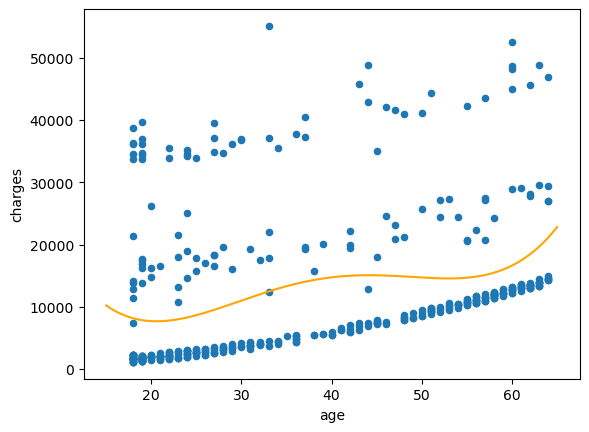

In [154]:
# Printing the actual plot to show age influence on charges with degree four polynomial
X_new = pd.DataFrame()
X_new["age"] = np.linspace(15, 65, num=1000)
X_new["age2"] = X_new["age"] ** 2
X_new["age3"] = X_new["age"] ** 3
X_new["age4"] = X_new["age"] ** 4
y_new_ = pd.Series(
    age4_model.predict(X_new),
    index=X_new["age"]
)

insurancedf.plot.scatter(x="age", y="charges")
y_new_.plot.line(c = "orange");

In [155]:
# Getting predictions for the degree 4 model
age4_pred = age4_model.predict(insurancedf[["age", "age2", "age3", "age4"]])

In [156]:
# Calculating the MSE and R^2 for the age2 model
age4MSE = mean_squared_error(insurancedf["charges"], age4_pred)
print(age4MSE)
age4R2 = r2_score(insurancedf["charges"], age4_pred)
print(age4R2)

125550389.64569828
0.10782931453183786


The degree four polynomial seems to be a better fit than the model in Q1 because it has a smaller MSE and a higher R2 value. 

4. Fit a polynomial model of degree 12. 

In [173]:
from sklearn.preprocessing import StandardScaler

# Standardizing the age variable
scaler = StandardScaler()
insurancedf["age_std"] = scaler.fit_transform(insurancedf[["age"]])


In [174]:
# Establishing a linear regression model for a degree 12 polynomial
insurancedf["age2"] = insurancedf["age_std"] ** 2
insurancedf["age3"] = insurancedf["age_std"] ** 3
insurancedf["age4"] = insurancedf["age_std"] ** 4
insurancedf["age5"] = insurancedf["age_std"] ** 5
insurancedf["age6"] = insurancedf["age_std"] ** 6
insurancedf["age7"] = insurancedf["age_std"] ** 7
insurancedf["age8"] = insurancedf["age_std"] ** 8
insurancedf["age9"] = insurancedf["age_std"] ** 9
insurancedf["age10"] = insurancedf["age_std"] ** 10
insurancedf["age11"] = insurancedf["age_std"] ** 11
insurancedf["age12"] = insurancedf["age_std"] ** 12


age12_model = LinearRegression()
age12_model.fit(
    X=insurancedf[["age_std", "age2", "age3", "age4", "age5", "age6", "age7", "age8", "age9", "age10", "age11", "age12"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [169]:
# Showing the slope and the y-intercept for this model
age12_model.coef_, age12_model.intercept_

(array([-4.13757123e+02,  4.05453208e+03,  1.31113413e+05,  8.79051075e+03,
        -4.40325816e+05, -1.26328755e+04,  6.15480723e+05, -6.76110326e+04,
        -3.85186248e+05,  9.58143013e+04,  8.91740567e+04, -3.24247031e+04]),
 np.float64(28542.417828598293))

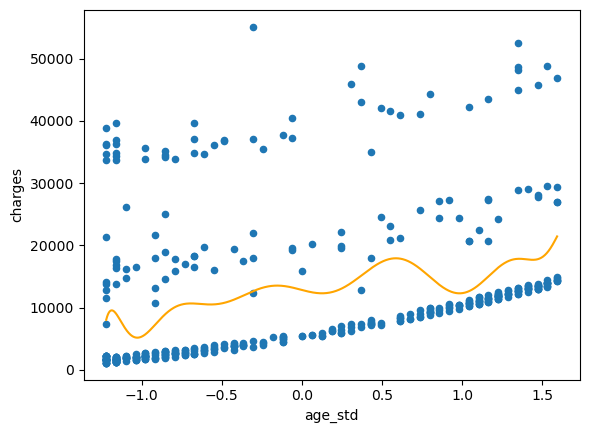

In [181]:
# Printing the actual plot to show age influence on charges with degree twelve polynomial
X_new = pd.DataFrame()
X_new["age_std"] = np.linspace(insurancedf["age_std"].min(), insurancedf["age_std"].max(), num=1000)
X_new["age2"] = X_new["age_std"] ** 2
X_new["age3"] = X_new["age_std"] ** 3
X_new["age4"] = X_new["age_std"] ** 4
X_new["age5"] = X_new["age_std"] ** 5
X_new["age6"] = X_new["age_std"] ** 6
X_new["age7"] = X_new["age_std"] ** 7
X_new["age8"] = X_new["age_std"] ** 8
X_new["age9"] = X_new["age_std"] ** 9
X_new["age10"] = X_new["age_std"] ** 10
X_new["age11"] = X_new["age_std"] ** 11
X_new["age12"] = X_new["age_std"] ** 12
y_new_ = pd.Series(
    age12_model.predict(X_new),
    index=X_new["age_std"]
)

insurancedf.plot.scatter(x="age_std", y="charges")
y_new_.plot.line(c = "orange");

In [183]:
# Getting predictions for the degree 12 model
age12_pred = age12_model.predict(insurancedf[["age_std", "age2", "age3", "age4", "age5", "age6", "age7", "age8", "age9", "age10", "age11", "age12"]])

In [184]:
# Calculating the MSE and R^2 for the age2 model
age12MSE = mean_squared_error(insurancedf["charges"], age12_pred)
print(age12MSE)
age12R2 = r2_score(insurancedf["charges"], age12_pred)
print(age12R2)

123911480.74409261
0.11947552672035966


The MSE of the degree 12 polynomial is smaller than that in Q1. The R2 is also larger than that in Q1, which demonstrates that this may be a better model than the one in Q1.

5. Which model is the best? 


According to the MSE and R-squared, the model with the degree 12 polynomial is the best of the models from this section because it has the lowest MSE and the highest R^2 value. I do not necessarily agree that this is the best model because I think further testing should be done. For instance, I would need to test the model on data that has not been shown to the model yet to determine how well it can actually predict.




6. Plotting the predictions from Q4 as a line plot.

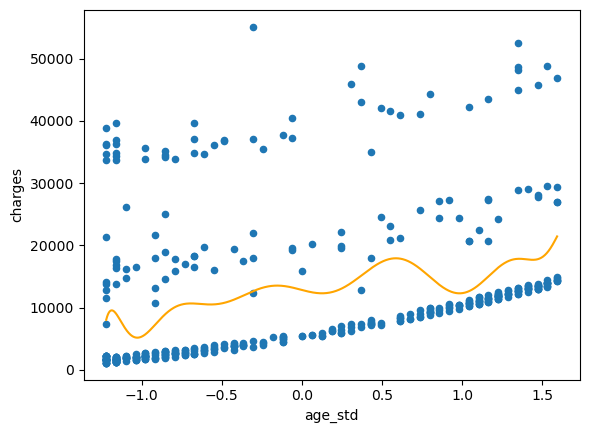

In [186]:
# Printing the actual plot to show age influence on charges with degree twelve polynomial
X_new = pd.DataFrame()
X_new["age_std"] = np.linspace(insurancedf["age_std"].min(), insurancedf["age_std"].max(), num=1000)
X_new["age2"] = X_new["age_std"] ** 2
X_new["age3"] = X_new["age_std"] ** 3
X_new["age4"] = X_new["age_std"] ** 4
X_new["age5"] = X_new["age_std"] ** 5
X_new["age6"] = X_new["age_std"] ** 6
X_new["age7"] = X_new["age_std"] ** 7
X_new["age8"] = X_new["age_std"] ** 8
X_new["age9"] = X_new["age_std"] ** 9
X_new["age10"] = X_new["age_std"] ** 10
X_new["age11"] = X_new["age_std"] ** 11
X_new["age12"] = X_new["age_std"] ** 12
y_new_ = pd.Series(
    age12_model.predict(X_new),
    index=X_new["age_std"]
)

insurancedf.plot.scatter(x="age_std", y="charges")
y_new_.plot.line(c = "orange");

**PART FOUR**: New Data

In [ ]:
# Reading in the new data and printing the first few lines
newdf = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
newdf = pd.get_dummies(newdf)
newdf = newdf * 1

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,23,34.400,1826.84300,0,1,1,0,0,0,0,1
1,56,40.300,10602.38500,0,1,1,0,0,0,0,1
2,18,34.100,1137.01100,0,1,1,0,0,0,1,0
3,63,23.085,14451.83515,1,0,1,0,1,0,0,0
4,63,28.310,13770.09790,0,1,1,0,0,1,0,0


This is for a model with only age as a predictor.

In [189]:
# Constructing a linear regression model for age
modelAGE = LinearRegression()
modelAGE.fit(
    X=insurancedf[["age"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [191]:
from sklearn.metrics import mean_squared_error

In [192]:
# Making a predictions on the new dataset
newAGEpred = modelAGE.predict(newdf[["age"]])

In [193]:
# Finding the MSE on the new data for the age/charges model
mseAGE = mean_squared_error(newdf["charges"], newAGEpred)
print("MSE for age model:", mseAGE)

MSE for age model: 136077136.50195494


This is for a model with age and bmi as predictors.

In [196]:
# Making a model that has age and bmi as predictors
modelAGEBMI = LinearRegression()
modelAGEBMI.fit(
    X=insurancedf[["age", "bmi"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [197]:
# Making a predictions on the new dataset
newAGEBMIpred = modelAGEBMI.predict(newdf[["age", "bmi"]])

In [198]:
# Finding the MSE for the AGE/BMI model
mseAGEBMI = mean_squared_error(newdf["charges"], newAGEBMIpred)
print("MSE for age/bmi model:", mseAGEBMI)

MSE for age/bmi model: 132636406.11081287


This is for a model with age, bmi, abd smoker as predictors.

In [199]:
# Making a model that has age, bmi, smoker as predictors
modelAGEBMISMOKE = LinearRegression()
modelAGEBMISMOKE.fit(
    X=insurancedf[["age", "bmi", "smoker_yes"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [200]:
# Making a prediction with the new data
newAGEBMISMOKEpred = modelAGEBMISMOKE.predict(newdf[["age", "bmi", "smoker_yes"]])

In [201]:
# Finding the MSE for the AGE/BMI/SMOKE model
mseAGEBMISMOKE = mean_squared_error(newdf["charges"], newAGEBMISMOKEpred)
print("MSE for age/bmi/smoke model:", mseAGEBMISMOKE)

MSE for age/bmi/smoke model: 35377541.2414163


This is for a model with age, and bmi, with both having an interaction term with smoker.

In [203]:
# Making the interaction terms on both datasets
insurancedf["age_smoker"] = insurancedf["age"] * insurancedf["smoker_yes"]
insurancedf["bmi_smoker"] = insurancedf["bmi"] * insurancedf["smoker_yes"]

newdf["age_smoker"] = newdf["age"] * newdf["smoker_yes"]
newdf["bmi_smoker"] = newdf["bmi"] * newdf["smoker_yes"]

In [207]:
# Making a model that has age and bmi interacting with smoke
modelINTERACT = LinearRegression()
modelINTERACT.fit(
    X=insurancedf[["age", "bmi", "age_smoker", "bmi_smoker"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [208]:
# Making a prediction with the new data
newINTERACTpred = modelINTERACT.predict(newdf[["age", "bmi", "age_smoker", "bmi_smoker"]])

In [209]:
# Finding the MSE for the INTERACT model
mseINTERACT = mean_squared_error(newdf["charges"], newINTERACTpred)
print("MSE for INTERACT model:", mseINTERACT)

MSE for INTERACT model: 24795908.412643347


This is for a model with age, bmi, and smoker interaction with smoker.

In [210]:
# Making a model that has smoke and age and bmi interacting with smoke
modelLAST = LinearRegression()
modelLAST.fit(
    X=insurancedf[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [211]:
# Making a prediction with the new data
newLASTpred = modelLAST.predict(newdf[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]])

In [212]:
# Finding the MSE for the INTERACT model
mseLAST = mean_squared_error(newdf["charges"], newLASTpred)
print("MSE for LAST model:", mseLAST)

MSE for LAST model: 21786256.866852593


The MSE is 136077136 for the age model, 132636406 for the age/bmi model, 35377541 for the age/bmi/smoke model, 24795908 for the interact model, and 21786256 for the last model. This shows that the last model is the best predictor because the MSE is the lowest.

Making a plot that shows the residuals for the last model.

In [213]:
# Computing the residuals
insurancedf["predicted"] = modelLAST.predict(insurancedf[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]])

insurancedf["residuals"] = insurancedf["charges"] - insurancedf["predicted"]

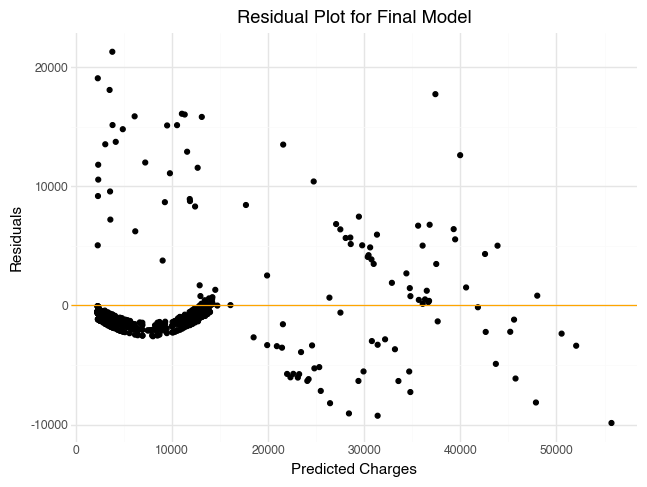

In [ ]:
from plotnine import ggplot, geom_point, aes, labs, theme_minimal, geom_hline

(
    ggplot(insurancedf, aes(x="predicted", y="residuals"))
    + geom_point()
    + geom_hline(yintercept=0, color="orange")
    + labs(
        x="Predicted Charges",
        y="Residuals"
    )
    + theme_minimal()
)


**PART FIVE: Full Exploration**

In [259]:
newdf.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker,sex_smoker,regionnortheast_smoker,regionnorthwest_smoker,regionsoutheast_smoker,age2,age3,age4,bmi2
0,23,34.400,1826.84300,0,1,1,0,0,0,0,1,0,0.0,0,0,0,0,529,12167,279841,1183.360000
1,56,40.300,10602.38500,0,1,1,0,0,0,0,1,0,0.0,0,0,0,0,3136,175616,9834496,1624.090000
2,18,34.100,1137.01100,0,1,1,0,0,0,1,0,0,0.0,0,0,0,0,324,5832,104976,1162.810000
3,63,23.085,14451.83515,1,0,1,0,1,0,0,0,0,0.0,0,0,0,0,3969,250047,15752961,532.917225
4,63,28.310,13770.09790,0,1,1,0,0,1,0,0,0,0.0,0,0,0,0,3969,250047,15752961,801.456100


In [225]:
# Making the interaction terms on both datasets
insurancedf["sex_smoker"] = insurancedf["sex_female"] * insurancedf["smoker_yes"]
insurancedf["regionnortheast_smoker"] = insurancedf["region_northeast"] * insurancedf["smoker_yes"]
insurancedf["regionnorthwest_smoker"] = insurancedf["region_northwest"] * insurancedf["smoker_yes"]
insurancedf["regionsoutheast_smoker"] = insurancedf["region_northeast"] * insurancedf["smoker_yes"]


newdf["sex_smoker"] = newdf["sex_female"] * newdf["smoker_yes"]
newdf["regionnortheast_smoker"] = newdf["region_northeast"] * newdf["smoker_yes"]
newdf["regionnorthwest_smoker"] = newdf["region_northwest"] * newdf["smoker_yes"]
newdf["regionsoutheast_smoker"] = newdf["region_northeast"] * newdf["smoker_yes"]

In [256]:
# Making a model that has smoke and age and bmi interacting with smoke
modelLAST = LinearRegression()
modelLAST.fit(
    X=insurancedf[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]],
    y=insurancedf["charges"]
)

LinearRegression()

In [257]:
# Making a prediction with the new data
newLASTpred = modelLAST.predict(newdf[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]])

In [258]:
# Finding the MSE for the INTERACT model
mseLAST = mean_squared_error(newdf["charges"], newLASTpred)
print("MSE for LAST model:", mseLAST)

MSE for LAST model: 21786256.866852593


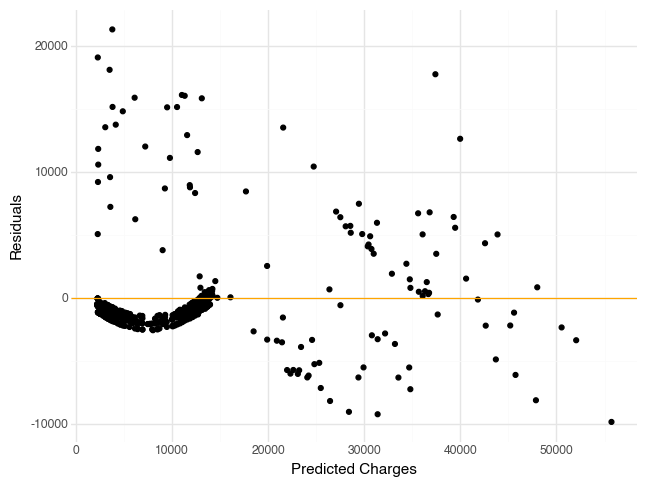

In [260]:
from plotnine import ggplot, geom_point, aes, labs, theme_minimal, geom_hline

(
    ggplot(insurancedf, aes(x="predicted", y="residuals"))
    + geom_point()
    + geom_hline(yintercept=0, color="orange")
    + labs(
        x="Predicted Charges",
        y="Residuals"
    )
    + theme_minimal()
)

I tried graphs with different polynomials of age, different interaction variables, included regions, and did many different combination, but this model had the lowest MSE, so I am deciding that the best model I have created is the model that takes into account age, bmi, smoker, and interactions between smoker and age/bmi variables.